<a href="https://colab.research.google.com/github/ArtemAvanesov/Python-Labs/blob/master/%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D1%8B/Autoencoders/autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Encoder

In [15]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
print(encoded.shape)

(None, 4, 4, 8)


# Decoder

In [16]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print(decoded.shape)

(None, 28, 28, 1)


# Set model params 

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and split data

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Train model

In [17]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1301 - val_loss: 0.1263
Epoch 2/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1253 - val_loss: 0.1226
Epoch 3/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1220 - val_loss: 0.1164
Epoch 4/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1197 - val_loss: 0.1193
Epoch 5/5
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1177 - val_loss: 0.1180


# Plot result

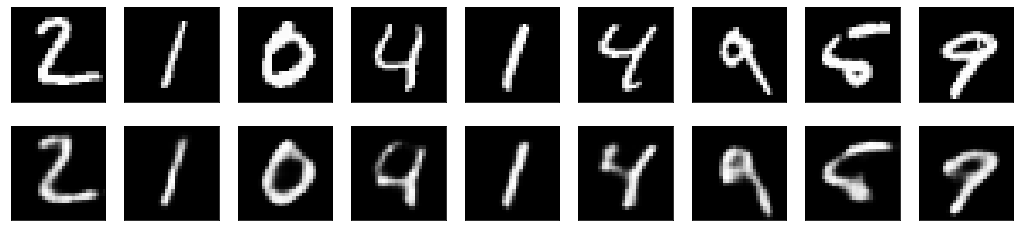

In [18]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n, 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)